In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

## 1. Dataset Preparation

Use the Kaggle News Category Dataset.

In [4]:
json_data = pd.read_json("News_Category_Dataset_v3.json", lines=True)
json_data

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [5]:
df = pd.DataFrame(json_data)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


Keep only the categories: POLITICS, TRAVEL, SPORTS, HOME & LIVING.

In [6]:
categories = ['POLITICS', 'TRAVEL', 'SPORTS', 'HOME & LIVING']
new_df = df[df['category'].isin(categories)]
new_df

,link,headline,category,short_description,authors,date
17,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19
24,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19
26,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19
30,https://www.huffpost.com/entry/europe-britain-...,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...","Darlene Superville, AP",2022-09-18
...,...,...,...,...,...,...
209478,https://www.huffingtonpost.com/entry/post_us_5...,Tea Time Beneath The Western Ghats (PHOTOS),TRAVEL,"As we stepped out of the serene plantation, we...","Stefani Jackenthal, Contributor\nAdventure Tra...",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


Select 1000 samples per category (total 4000).

In [7]:
new_df= new_df.groupby('category').apply(lambda x: x.sample(1000, random_state=42)).reset_index(drop=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19304\3649552569.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_df= new_df.groupby('category').apply(lambda x: x.sample(1000, random_state=42)).reset_index(drop=True)


Retain only the short_description column and corresponding label.

In [8]:
new_df = new_df[['short_description', 'category']]
new_df

,short_description,category
0,"For many people, the most hectic shopping day ...",HOME & LIVING
1,"The comedy special ""Aziz Ansari: Right Now"" de...",HOME & LIVING
2,"Yep, it really can.",HOME & LIVING
3,"You've got to be kidding us, it's a horse-shap...",HOME & LIVING
4,Life is expensive! Use your talents to help de...,HOME & LIVING
...,...,...
3995,"Leshan Giant Buddha, China An old Chinese monk...",TRAVEL
3996,If you're one of the many families getting rea...,TRAVEL
3997,,TRAVEL
3998,Groups like Girls LOVE Travel and the Solo Fem...,TRAVEL


Perform an 80/20 stratified split into train and test sets.

In [9]:
train_df, test_df = train_test_split(new_df, test_size=0.2, stratify=new_df['category'], random_state=42)

## 2. Word Frequency & Word Cloud

Generate word clouds from the short_description texts in the training set for each category.

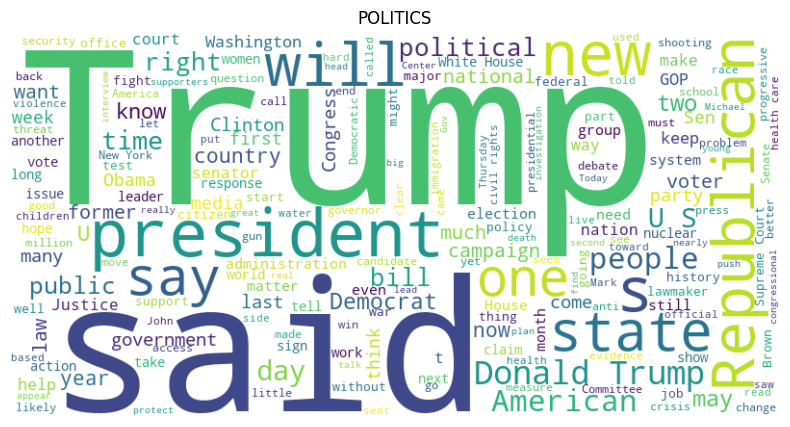

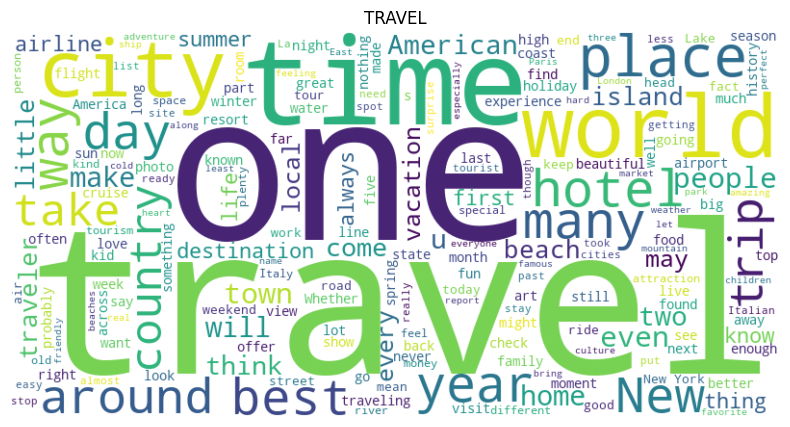

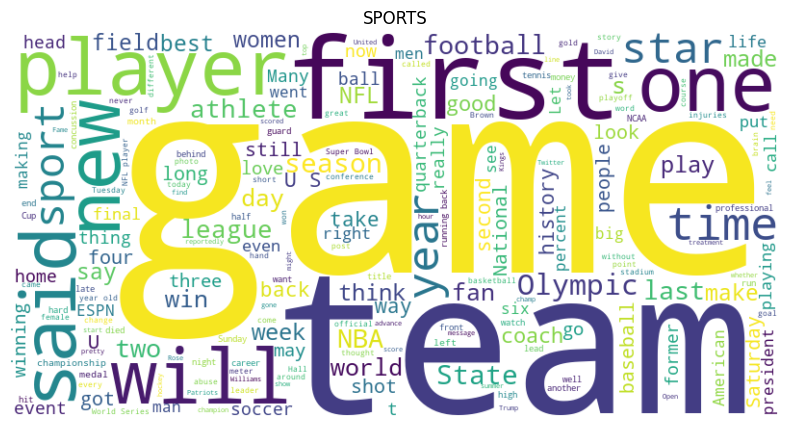

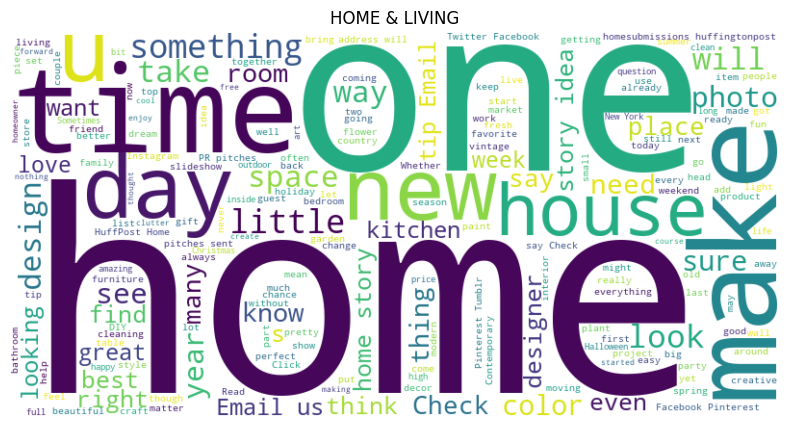

In [10]:
for category in categories:
    text = ' '.join(train_df[train_df['category'] == category]['short_description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(category)
    plt.show()

Extract the most frequent words per category.<br>
Save these into category-specific sets.

In [11]:
def get_frequent_words(text_series, n):
    text = ' '.join(text_series)
    words = text.split()
    common_words = Counter(words).most_common(n)
    return set(word for word, _ in common_words)

frequent_words = {category: get_frequent_words(train_df[train_df['category'] == category]['short_description'], 10) for category in categories}
frequent_words

{'POLITICS': {'The', 'a', 'and', 'for', 'in', 'is', 'of', 'that', 'the', 'to'},
 'TRAVEL': {'a', 'and', 'for', 'in', 'is', 'of', 'that', 'the', 'to', 'you'},
 'SPORTS': {'The', 'a', 'and', 'for', 'in', 'is', 'of', 'on', 'the', 'to'},
 'HOME & LIVING': {'a',
  'and',
  'for',
  'in',
  'is',
  'of',
  'the',
  'to',
  'you',
  'your'}}

## 3. Classification Approach

Classify test samples based on the presence of frequent words in their short_description.<br>
Start with top 10 frequent words per category.<br>
Increase to 20, 30, 50… words and compare results.

In [12]:
def classify(test_sample):
    overlaps = {category: len(frequent_words[category].intersection(set(test_sample.split()))) for category in categories}
    max_overlap = max(overlaps.values())
    candidates = [category for category, count in overlaps.items() if count == max_overlap]

    return candidates[0] if len(candidates) == 1 else "unknown"

test_df['predicted_category'] = test_df['short_description'].apply(classify)

In [13]:
results = {}
for n in [10, 20, 30, 50]:
    frequent_words = {category: get_frequent_words(train_df[train_df['category'] == category]['short_description'], n) for category in categories}
    test_df['predicted_category'] = test_df['short_description'].apply(classify)
    accuracy = (test_df['predicted_category'] == test_df['category']).mean()
    results[n] = accuracy

In [18]:
results

{10: np.float64(0.07125),
 20: np.float64(0.12),
 30: np.float64(0.15),
 50: np.float64(0.15875)}

## 4. Evaluation

Compute performance using accuracy.<br>
Compare how classification improves (or not) as more frequent words are used.

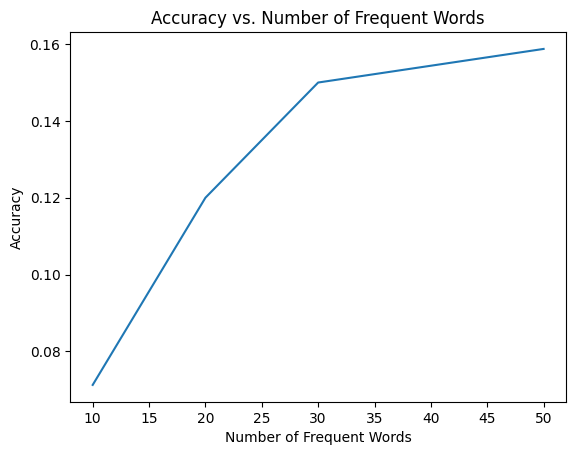

In [17]:
plt.plot(results.keys(), results.values())
plt.xlabel('Number of Frequent Words')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Frequent Words')
plt.show()